In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 4.3MB 49.8MB/s 
     |████████████████████████████████| 501kB 53.1MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,ZeroPadding2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


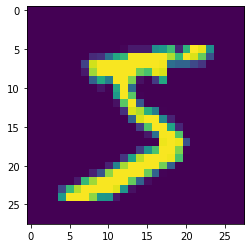

In [ ]:
plt.imshow(x_train[0])

In [ ]:
print(x_train.shape)
print(x_test.shape)
y_train.shape

(60000, 28, 28)
(10000, 28, 28)


(60000,)

In [ ]:
x_test=x_test/255.0
x_train=x_train/255.0

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
input_shape=x_train[0].shape

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 142s 302ms/step - loss: 0.4869 - accuracy: 0.8501 - val_loss: 0.0576 - val_accuracy: 0.9822
Epoch 2/10
469/469 [==============================] - 151s 321ms/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0367 - val_accuracy: 0.9867
Epoch 3/10
469/469 [==============================] - 142s 302ms/step - loss: 0.0616 - accuracy: 0.9817 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 142s 303ms/step - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0294 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 140s 299ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 140s 299ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0309 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 140s 298ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0284 -